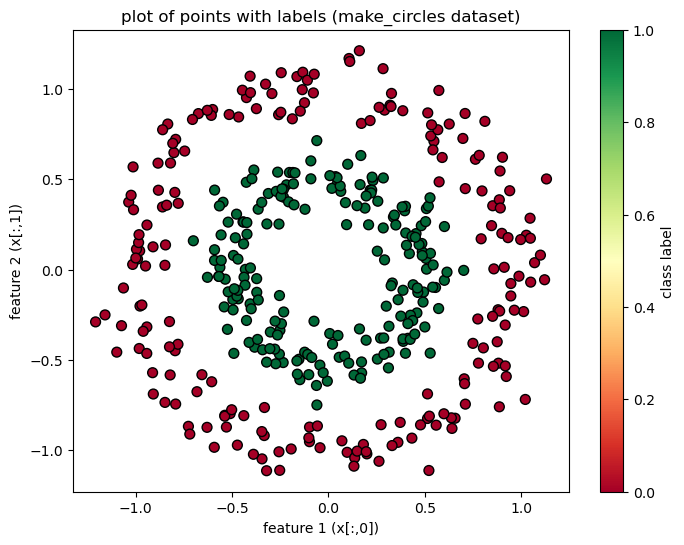

In [1]:
import numpy as np
import matplotlib.pyplot as ptl
from sklearn.datasets import make_circles

#generate data(circles)
x,y = make_circles(n_samples = 400, noise = .1, factor = .5, random_state = 0)

#plot the points
ptl.figure(figsize = (8,6))
ptl.scatter(x[:, 0], x[:, 1], c=y, cmap=ptl.cm.RdYlGn, edgecolor='k', marker="o", s=50)
ptl.xlabel("feature 1 (x[:,0])")
ptl.ylabel("feature 2 (x[:,1])")
ptl.title("plot of points with labels (make_circles dataset)")
ptl.colorbar(label = "class label")
ptl.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.neural_network import MLPClassifier
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interactive

#function to update & display plot
def updatePlot(hidden_layer_size):
    #generate data(circle)
    x,y = make_circles(n_samples = 400, noise = .1, factor = .5, random_state = 0)
    #create a multilayer preceptron (MLP) classifier
    clf = MLPClassifier(hidden_layer_sizes = (hidden_layer_size,),
                       activation = "relu", max_iter = 3000, random_state = 1)

    #fit the classifier to the data
    clf.fit(x,y)

    #create a grid of points for display
    #there is 1D array of 100 values each, representing the x and y coordinates of the grid
    xValue = np.linespace(x[:,0].min() -.1 , x[:,0].max()+.1 , 100)
    yValue = np.linespace(x[:,1].min() -.1 , x[:,1].max()+.1 , 100)

    #the result of xPlane and yPlane are both 100 * 100 arrays,
    #representing the grid of 10000 points
    xPlane,yPlane = np.meshgrid(xValue,yValue)

    #grid_point is a single 2D array of shape (10000, 2)
    #where each row represente a point in the grid
    grid_points = np.column_stack((xPlane.ravel(),yPlane.ravel()))

    #predict class labels for the grid points
    Z = clf.predict(grid_points)

    #Z.reshape(xPlane.shape) reshape Z into 100* 100 array
    Z = Z.reshape(xPlane.shape)

    #predict class labels for the original data points
    yPred = clf.predict(x)

    #clear plots
    plt.clf()

    #plot the decision boundary
    #it is often used to diaplay the decision boundary of a model by ploting
    #the predicted class probabilities or labels across a grid of point

    plt.contourf(xPlane,yPlane,Z,levels = [-.5,.5,1.5], cmap=plt.cm.RdYlGn, alpha = .6)

    #plot the original data point with their predicted labels
    #separate points for each predicted class
    class0 = yPred == 0 #Indices of points predicted as class 0
    class1 = yPred == 1 #Indices of points predicted as class 1

    plt.scatter(x[class0,0],x[class0,1], c = "red",edgecolos = "k", marker = "o", s = 50, label="predicted class 0")
    plt.scatter(x[class1,0],x[class1,1], c = "green",edgecolos = "k", marker = "o", s = 50, label="predicted class 1")

    #add label and title
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title(f'decition boundry and predicted labels (hidden layer size={hidden_layer_size})')
    plt.legend()
    plt.show()

In [3]:

# function to update & display plot
def updatePlot(hidden_layer_size):
    # generate data (circles)
    x, y = make_circles(n_samples=400, noise=0.1, factor=0.5, random_state=0)

    # create a multilayer perceptron (MLP) classifier
    clf = MLPClassifier(hidden_layer_sizes=(hidden_layer_size,),
                        activation="relu", max_iter=3000, random_state=1)

    # fit the classifier to the data
    clf.fit(x, y)

    # create a grid of points for display
    xValue = np.linspace(x[:, 0].min() - 0.1, x[:, 0].max() + 0.1, 100)
    yValue = np.linspace(x[:, 1].min() - 0.1, x[:, 1].max() + 0.1, 100)
    xPlane, yPlane = np.meshgrid(xValue, yValue)

    # grid_points is a single 2D array of shape (10000, 2)
    grid_points = np.column_stack((xPlane.ravel(), yPlane.ravel()))

    # predict class labels for the grid points
    Z = clf.predict(grid_points).reshape(xPlane.shape)

    # predict class labels for the original data points
    yPred = clf.predict(x)

    # clear plots
    plt.clf()

    # plot the decision boundary
    plt.contourf(xPlane, yPlane, Z, levels=[-0.5, 0.5, 1.5],
                 cmap=plt.cm.RdYlGn, alpha=0.6)

    # plot the original data points with predicted labels
    class0 = yPred == 0
    class1 = yPred == 1
    plt.scatter(x[class0, 0], x[class0, 1],
                c="red", edgecolors="k", marker="o", s=50, label="Predicted class 0")
    plt.scatter(x[class1, 0], x[class1, 1],
                c="green", edgecolors="k", marker="o", s=50, label="Predicted class 1")

    # add labels and title
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(f"Decision boundary and predicted labels (hidden layer size={hidden_layer_size})")
    plt.legend()
    plt.show()


In [5]:
#create a slider for hidden layer size
hidden_layer_size_slider = widgets.IntSlider(value = 1 , min = 1, max = 20, step = 1 ,description = "hidden layer size")

#create an intractive widget
##intractive_plot = intractive(updatePlot, hidden_layer_size = hidden_layer_)size_slider)
interactive_plot = interactive(updatePlot, hidden_layer_size=hidden_layer_size_slider)

#display the widget
display(interactive_plot)


                                             

interactive(children=(IntSlider(value=1, description='hidden layer size', max=20, min=1), Output()), _dom_clas…